In [ ]:
#Importing all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#As dataset is already present in Colab's file directly, next we will read the dataset.

df_train = pd.read_csv('TRAIN.csv')

#for top five values:
df_train.head(5)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [ ]:
# Get the shape of the dataset
print(f"The dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns.")


The dataset has 188340 rows and 10 columns.


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [ ]:
# Summary statistics for numerical columns
df_train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


##**Handling Missing Values**


In [ ]:
#checking if there are any null values present in the dataset

df_train.isnull().values.any()


False

In [ ]:
#Let's check how many null values are present for all the columns

df_train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

Clearly, there are no missing values in the dataset in any of the columns. So thetre is no need of imputing or removing the null values.

##**Outlier Detection**

Outlier detection is crucial to ensure that your data analysis and model predictions are not skewed by anomalous values. Here are the steps to detect and handle outliers in your dataset:

**Visual Inspection**: Use box plots and scatter plots to visually inspect for outliers.

**Statistical Method**s: Use statistical methods like Z-score and IQR to identify outliers.

**Handling Outliers**: Decide on a strategy to handle the outliers, such as removing them, capping them, or transforming them.

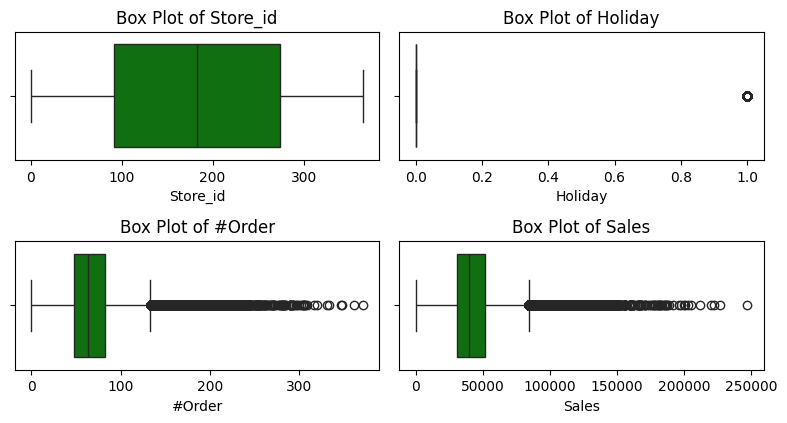

In [ ]:
# Select numerical columns
numerical_columns = df_train.select_dtypes(include=[np.number]).columns

# Determine the number of columns to plot
num_columns = len(numerical_columns)

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column in the grid
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_train[column], ax=axes[i], color = 'green')
    axes[i].set_title(f'Box Plot of {column}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df_train.select_dtypes(include=[np.number])))
print(z_scores)

# Identify outliers
outliers = np.where(z_scores > 3)

# Get the indices of outliers
outlier_indices = np.unique(outliers[0])
print(f'Indices of outliers: {outlier_indices}')

# Display outliers
print(df_train.iloc[outlier_indices])

        Store_id   Holiday    #Order     Sales
0       1.727312  2.566756  1.943251  1.938189
1       0.664351  2.566756  0.269328  0.487889
2       0.654860  2.566756  0.860124  0.320542
3       0.645369  2.566756  1.483743  1.249910
4       0.635879  2.566756  0.203683  0.153343
...          ...       ...       ...       ...
188335  0.322685  2.566756  0.564726  0.298663
188336  0.284722  2.566756  0.715334  0.638702
188337  0.275231  2.566756  0.400616  0.604647
188338  0.265740  2.566756  0.058893  0.345571
188339  0.294212  2.566756  0.696014  0.260466

[188340 rows x 4 columns]
Indices of outliers: [   180    306    373 ... 188036 188241 188320]
              ID  Store_id Store_Type Location_Type Region_Code        Date  \
180     T1000181        86         S1            L1          R4  2018-01-01   
306     T1000307       176         S4            L2          R3  2018-01-01   
373     T1000374       153         S4            L2          R1  2018-01-02   
403     T1000404       1

In [ ]:
# Calculate IQR

numeric_columns = df_train.select_dtypes(include=[np.number]).columns
Q1 = df_train[numeric_columns].quantile(0.25)
Q3 = df_train[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (df_train[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_train[numeric_columns] > (Q3 + 1.5 * IQR))

# Get the indices of outliers
outlier_indices = np.where(outliers)
print(f'Indices of outliers: {np.unique(outlier_indices[0])}')

# Display outliers
print(df_train.iloc[np.unique(outlier_indices[0])])

Indices of outliers: [     0      1      2 ... 188337 188338 188339]
              ID  Store_id Store_Type Location_Type Region_Code        Date  \
0       T1000001         1         S1            L3          R1  2018-01-01   
1       T1000002       253         S4            L2          R1  2018-01-01   
2       T1000003       252         S3            L2          R1  2018-01-01   
3       T1000004       251         S2            L3          R1  2018-01-01   
4       T1000005       250         S2            L3          R4  2018-01-01   
...          ...       ...        ...           ...         ...         ...   
188335  T1188336       149         S2            L3          R2  2019-05-31   
188336  T1188337       153         S4            L2          R1  2019-05-31   
188337  T1188338       154         S1            L3          R2  2019-05-31   
188338  T1188339       155         S3            L1          R2  2019-05-31   
188339  T1188340       152         S2            L1          R

### Removing Outliers


In [ ]:
df_train_capped = df_train.copy()

# Define cap values
cap_lower = Q1 - 1.5 * IQR
cap_upper = Q3 + 1.5 * IQR

# Apply capping
for column in df_train_capped.select_dtypes(include=[np.number]).columns:
    df_train_capped[column] = np.where(df_train_capped[column] < cap_lower[column], cap_lower[column], df_train_capped[column])
    df_train_capped[column] = np.where(df_train_capped[column] > cap_upper[column], cap_upper[column], df_train_capped[column])

print(df_train_capped.describe())

            Store_id   Holiday         #Order          Sales
count  188340.000000  188340.0  188340.000000  188340.000000
mean      183.000000       0.0      67.181353   42285.406654
std       105.366308       0.0      27.192056   16811.001551
min         1.000000       0.0       0.000000       0.000000
25%        92.000000       0.0      48.000000   30426.000000
50%       183.000000       0.0      63.000000   39678.000000
75%       274.000000       0.0      82.000000   51909.000000
max       365.000000       0.0     133.000000   84133.500000


##**Univariate Analysis**


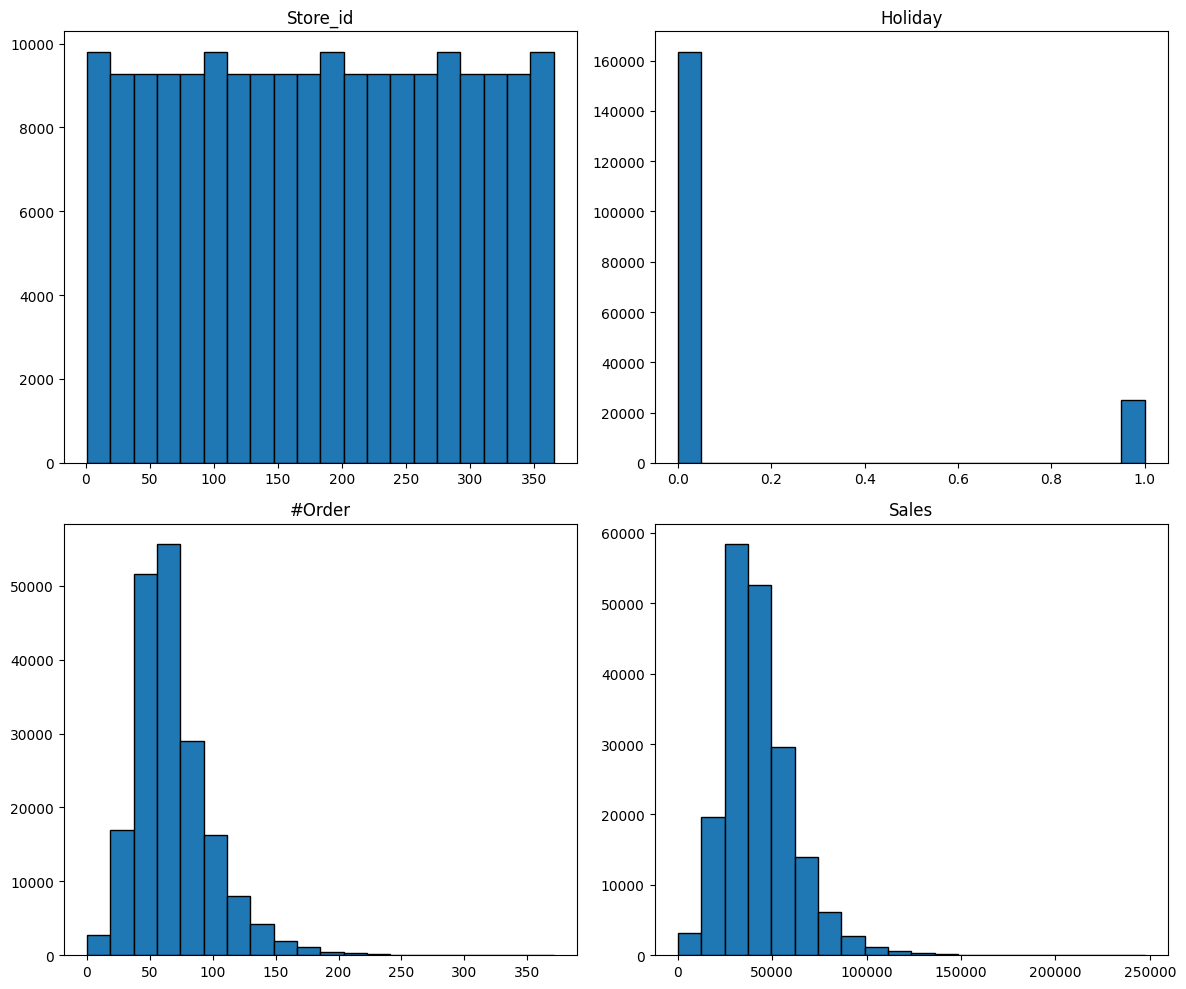

In [ ]:
# Histograms for each numerical column
df_train.hist(figsize=(12, 10), bins=20, grid = False, edgecolor = 'black')
plt.tight_layout()
plt.show()

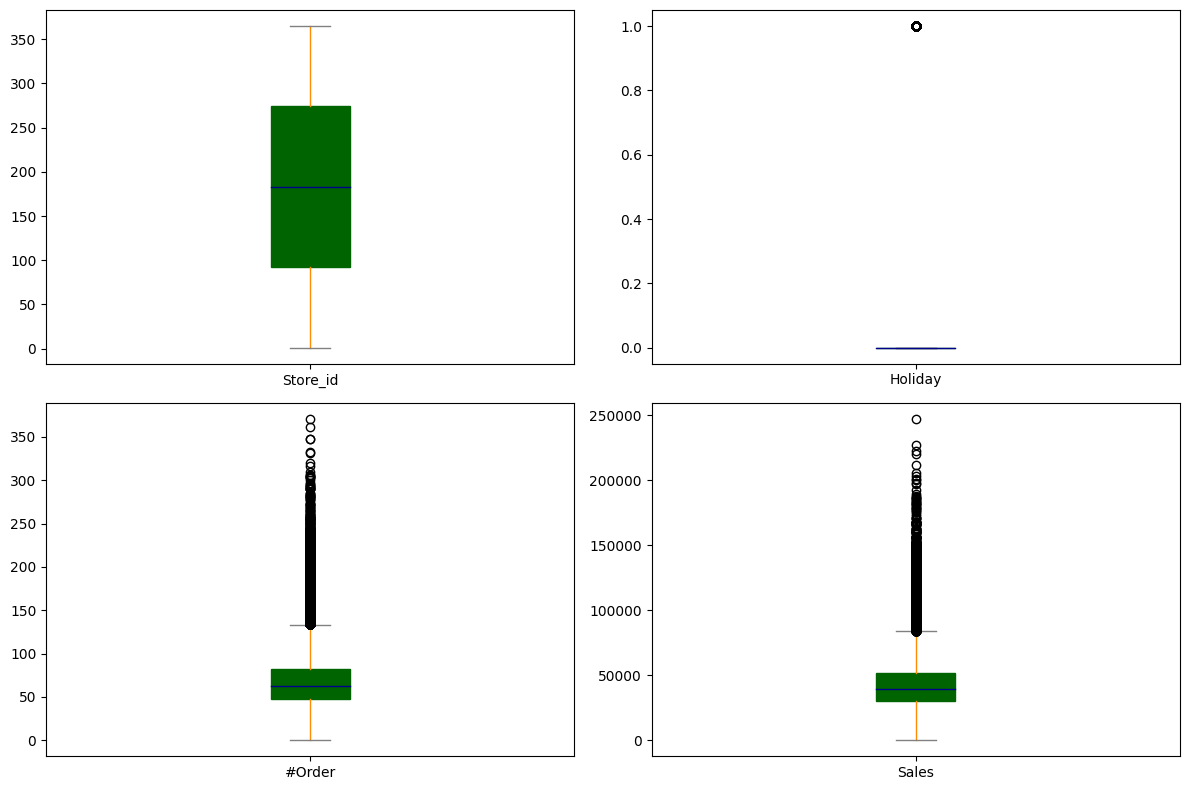

In [ ]:
# Define color properties
color = {
    'boxes': 'DarkGreen',     # Color of the box
    'whiskers': 'DarkOrange', # Color of the whiskers
    'medians': 'DarkBlue',    # Color of the median line
    'caps': 'Gray'            # Color of the caps
}

# Box plots with specified colors
df_train.plot(kind='box', subplots=True, layout=(2, 2), figsize=(12, 8), color=color, patch_artist=True)
plt.tight_layout()
plt.show()

##**Bivariate Analysis**


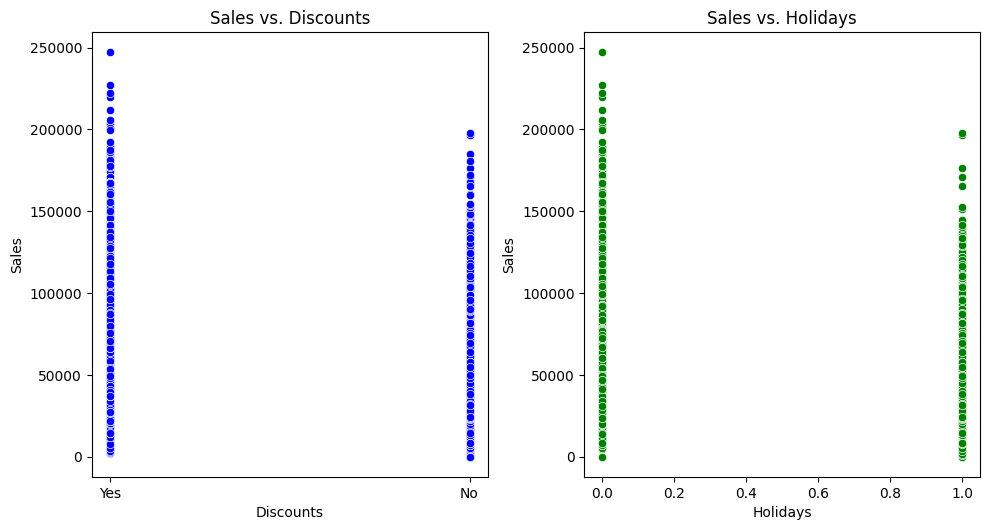

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(10,10))

# Scatter plot for Sales vs. Discounts
plt.subplot(2, 2, 1)
sns.scatterplot(x='Discount', y='Sales', data=df_train, color='blue')
plt.title('Sales vs. Discounts')
plt.xlabel('Discounts')
plt.ylabel('Sales')
plt.grid(False)

# Scatter plot for Sales vs. Holidays
plt.subplot(2, 2, 2)
sns.scatterplot(x='Holiday', y='Sales', data=df_train, color='green')
plt.title('Sales vs. Holidays')
plt.xlabel('Holidays')
plt.ylabel('Sales')
plt.grid(False)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

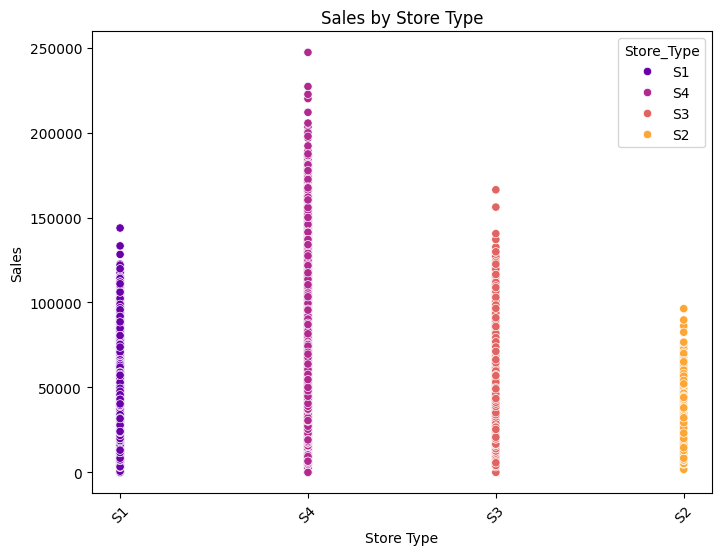

In [ ]:
# Mapping store types to colors for the scatter plot
store_types = df_train['Store_Type'].unique()
colors = plt.cm.spring(np.linspace(0, 1, len(store_types)))
color_dict = dict(zip(store_types, colors))

# Scatter plot for Sales vs. Store Type
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Store_Type', y='Sales', data=df_train, hue='Store_Type', palette= 'plasma')
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(False)  # Disable grid lines

# Display the plot
plt.show()

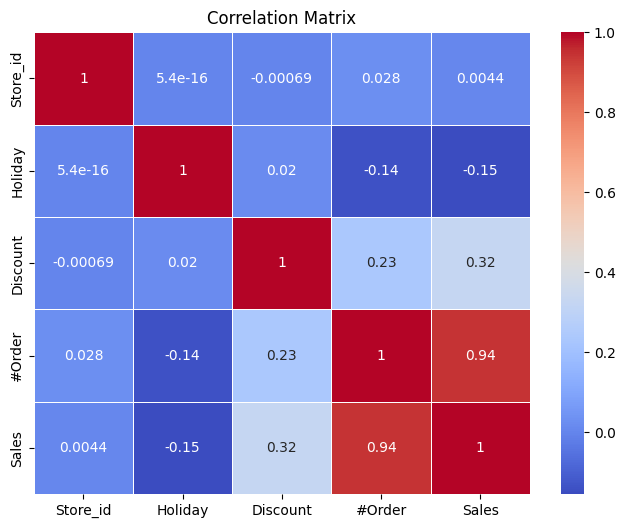

In [ ]:
df_train['Discount'] = df_train['Discount'].map({'Yes': 1, 'No': 0})

# Now you can calculate the correlation matrix including the 'discount' column if needed
numeric_df = df_train.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

##**Categorical Data Analysis**

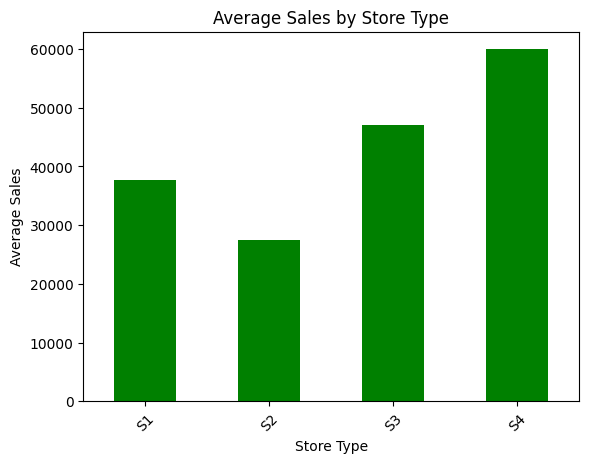

In [ ]:
# Grouping sales by store type
grouped_data = df_train.groupby('Store_Type')['Sales'].mean()

# Bar plot for sales by store type
grouped_data.plot(kind='bar', color='green')
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

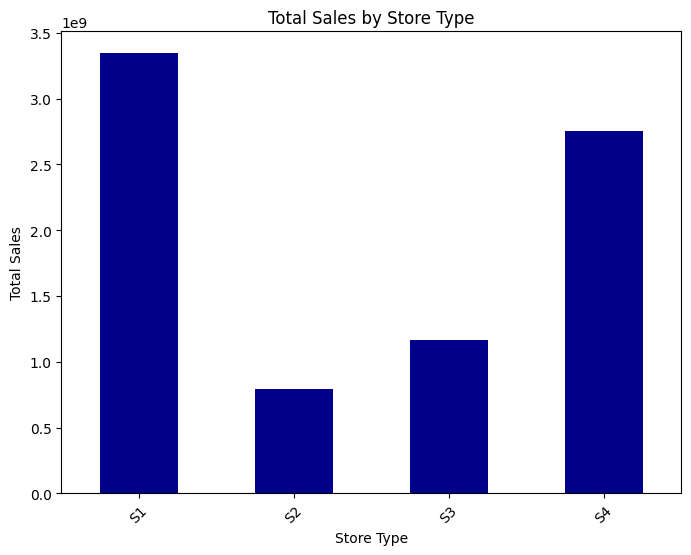

In [ ]:
# Grouping sales by store type
store_type_sales = df_train.groupby('Store_Type')['Sales'].sum()

# Create a bar chart for sales by store type
plt.figure(figsize=(8, 6))
store_type_sales.plot(kind='bar', color= 'darkblue')
plt.title('Total Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Frequency table for store types
store_type_freq = df_train['Store_Type'].value_counts()
store_type_sales_avg = df_train.groupby('Store_Type')['Sales'].mean()

# Create a DataFrame for the frequency table
store_type_table = pd.DataFrame({'Count': store_type_freq, 'Average Sales': store_type_sales_avg})
print(store_type_table)

            Count  Average Sales
Store_Type                      
S1          88752   37676.511694
S2          28896   27530.828222
S3          24768   47063.068209
S4          45924   59945.685926


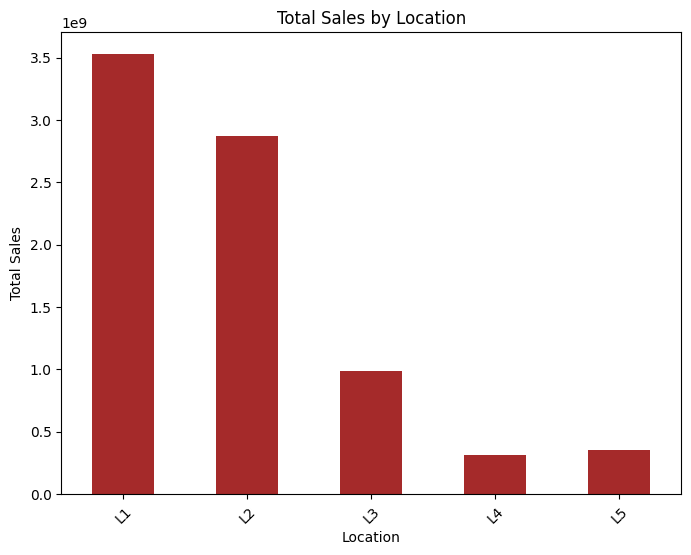

In [ ]:
location_sales = df_train.groupby('Location_Type')['Sales'].sum()

# Create a bar chart for sales by location
plt.figure(figsize=(8, 6))
location_sales.plot(kind='bar', color= 'brown')
plt.title('Total Sales by Location')
plt.xlabel('Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Frequency table for locations
location_freq = df_train['Location_Type'].value_counts()
location_sales_avg = df_train.groupby('Location_Type')['Sales'].mean()

# Create a DataFrame for the frequency table
location_table = pd.DataFrame({'Count': location_freq, 'Average Sales': location_sales_avg})
print(location_table)

               Count  Average Sales
Location_Type                      
L1             85140   41453.597889
L2             48504   59231.480373
L3             29928   33072.257756
L4             10836   29067.414313
L5             13932   25187.787261


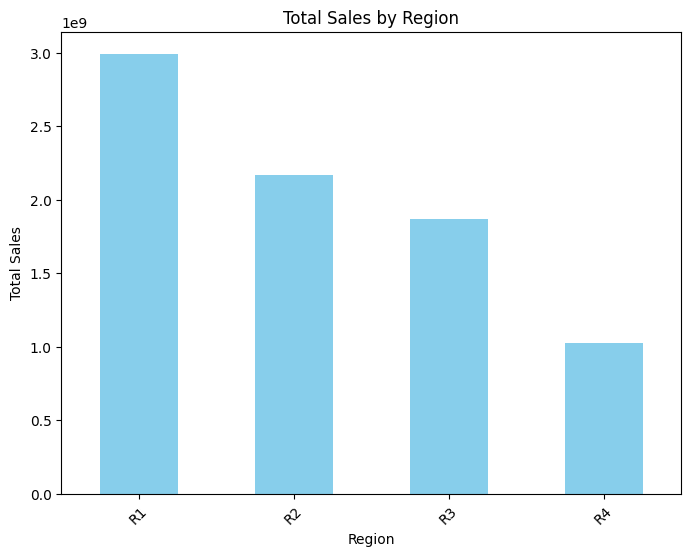

In [ ]:
# Assuming you have a 'region' column in your dataframe
region_sales = df_train.groupby('Region_Code')['Sales'].sum()

# Create a bar chart for sales by region
plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar', color= 'skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Frequency table for regions
region_freq = df_train['Region_Code'].value_counts()
region_sales_avg = df_train.groupby('Region_Code')['Sales'].mean()

# Create a DataFrame for the frequency table
region_table = pd.DataFrame({'Count': region_freq, 'Average Sales': region_sales_avg})
print(region_table)

             Count  Average Sales
Region_Code                      
R1           63984   46765.488405
R2           54180   40054.847344
R3           44376   42144.517063
R4           25800   39743.434249


##**Time Series Analysis**

Time series analysis is a powerful way to analyze sales data over time to uncover patterns like seasonality, trends, and cyclic behavior. Here's a step-by-step guide to performing a basic time series analysis on your sales data.

In [ ]:
# Convert 'date' column to datetime
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Set 'date' as the index of the DataFrame
df_train.set_index('Date', inplace=True)

# Sort the DataFrame by the datetime index
df_train.sort_index(inplace=True)

**Time Series Decomposition:**

We will use statsmodels for decomposing the time series.

In [ ]:
# Check the current index and its frequency
print(df_train.index)

DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01',
               '2018-01-01', '2018-01-01',
               ...
               '2019-05-31', '2019-05-31', '2019-05-31', '2019-05-31',
               '2019-05-31', '2019-05-31', '2019-05-31', '2019-05-31',
               '2019-05-31', '2019-05-31'],
              dtype='datetime64[ns]', name='Date', length=188340, freq=None)


In [ ]:
# Aggregate sales data by date (summing sales)
daily_sales = df_train.resample('D').sum()  # Change 'sum' to 'mean' or another method if appropriate

# Check the new DataFrame
print(daily_sales.head())

                                                           ID  Store_id  \
Date                                                                      
2018-01-01  T1000001T1000002T1000003T1000004T1000005T10000...     66795   
2018-01-02  T1000366T1000367T1000368T1000369T1000370T10003...     66795   
2018-01-03  T1000731T1000732T1000733T1000734T1000735T10007...     66795   
2018-01-04  T1001096T1001097T1001098T1001099T1001100T10011...     66795   
2018-01-05  T1001461T1001462T1001463T1001464T1001465T10014...     66795   

                                                   Store_Type  \
Date                                                            
2018-01-01  S1S4S3S2S2S1S1S1S3S4S4S4S4S4S1S3S3S1S2S2S1S3S1...   
2018-01-02  S1S2S1S2S4S1S1S4S4S1S4S2S2S1S1S3S1S1S1S3S3S1S2...   
2018-01-03  S1S3S1S4S1S4S3S2S2S1S1S4S4S1S1S2S4S4S4S1S2S4S4...   
2018-01-04  S1S1S4S4S2S2S1S2S1S1S2S2S3S2S3S1S1S1S4S1S1S1S1...   
2018-01-05  S3S1S1S4S1S1S1S2S1S1S4S3S4S3S3S4S3S3S1S2S1S1S1...   

                  

In [ ]:
# Check if there are missing dates in the range
print(daily_sales.asfreq('D').isnull().sum())

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64


<Figure size 1200x800 with 0 Axes>

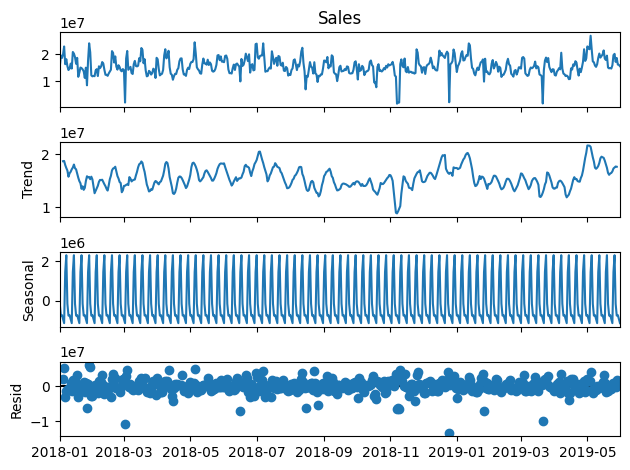

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the daily time series

result = seasonal_decompose(daily_sales['Sales'], model='additive')  # or 'multiplicative'

# Plot the decomposed time series
plt.figure(figsize=(12, 8))
result.plot()
plt.show()

<Figure size 1200x800 with 0 Axes>

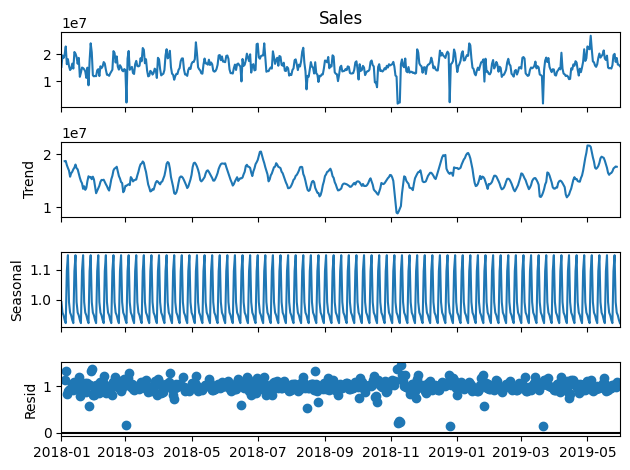

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the daily time series

result = seasonal_decompose(daily_sales['Sales'], model='multiplicative')

# Plot the decomposed time series
plt.figure(figsize=(12, 8))
result.plot()
plt.show()

The time series decomposition reveals an overall upward trend in sales, indicating growth over time. The strong seasonal component suggests that sales exhibit regular, predictable fluctuations, likely tied to seasonal factors. The residuals are scattered randomly, indicating that most predictable patterns in the sales data have been captured by the trend and seasonal components. This decomposition helps identify both long-term growth and periodic variations in sales.

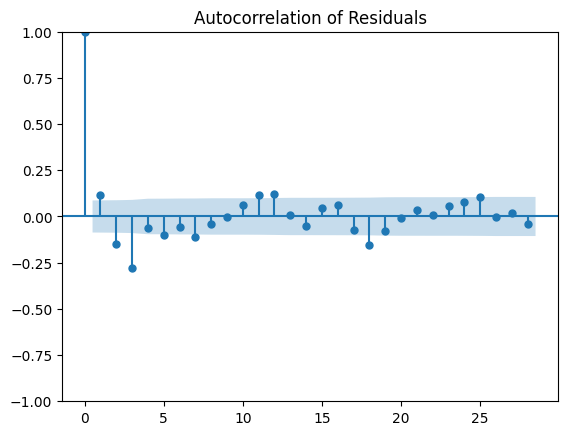

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot autocorrelation for residuals of the chosen model
plot_acf(result.resid.dropna())  # use result from either the additive or multiplicative model
plt.title('Autocorrelation of Residuals')
plt.show()

**Summary of Time Series Analysis:**

**Trend Analysis:**

The sales data shows a slight upward trend over the period from January 2018 to May 2019.

**Seasonality:**

Strong seasonal patterns are observed, likely due to weekly or monthly cycles affecting sales.

**Residual Analysis:**

The residuals appear random, suggesting that the decomposition effectively captured the main patterns.


**Cyclic Behavior:**

No strong evidence of cyclic behavior was found within the observed period.

##**Hypothesis Testing**

###***Impact of discount on sales***

**Null Hypothesis (H0)**: Stores offering discounts do not have significantly higher sales than stores not offering discounts.


**Alternative Hypothesis (H1)**: Stores offering discounts have significantly higher sales than stores not offering discounts.

*We will use a two-sample t-test to compare the mean sales on days with discounts versus days without discounts.*

In [ ]:
# Separate the sales data into two groups: with discounts and without discounts
sales_with_discounts = df_train[df_train['Discount'] == 1]['Sales']
sales_without_discounts = df_train[df_train['Discount'] == 0]['Sales']

# Display basic statistics for both groups
print(sales_with_discounts.describe())


count     84289.000000
mean      49426.497620
std       19071.656642
min        1969.140000
25%       36625.350000
50%       46242.000000
75%       58869.000000
max      247215.000000
Name: Sales, dtype: float64


In [ ]:
print(sales_without_discounts.describe())

count    104051.000000
mean      37403.679678
std       16039.555183
min           0.000000
25%       27069.000000
50%       34791.000000
75%       44968.500000
max      197840.610000
Name: Sales, dtype: float64


In [ ]:
from scipy.stats import ttest_ind

# Perform the t-test
t_stat, p_value = ttest_ind(sales_with_discounts, sales_without_discounts, equal_var=False)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 145.92946158629138
P-value: 0.0


**Interpretation:**

*P-value Interpretation:*

The p-value is 0.0, which is less than the typical significance level of 0.05.
This indicates that the difference in sales between stores offering discounts and those not offering discounts is statistically significant.

*T-statistic:*

A high absolute value of the t-statistic (145.93) further supports the significant difference between the two groups.

**Conclusion:**

* Since the p-value is less than 0.05, we reject the null hypothesis.


* This means that there is a significant difference in sales between stores offering discounts and those not offering discounts.

* Specifically, stores offering discounts have significantly higher sales than stores not offering discounts.

###***Effect of Holidays on Sales***

**Null Hypothesis (H0)**: Sales on holidays are not significantly higher than sales on regular days.

**Alternative Hypothesis (H1)**: Sales on holidays are significantly higher than sales on regular days

*We'll perform a t-test to compare the mean sales on holidays versus regular days.*

In [ ]:
# Separate the sales data into two groups: holidays and non-holidays
sales_on_holidays = df_train[df_train['Holiday'] == 1]['Sales']
sales_on_non_holidays = df_train[df_train['Holiday'] == 0]['Sales']

# Display basic statistics for both groups
print(sales_on_holidays.describe())

count     24820.000000
mean      35451.878930
std       18822.332593
min           0.000000
25%       23778.570000
50%       33417.540000
75%       45247.125000
max      197840.610000
Name: Sales, dtype: float64


In [ ]:
print(sales_on_non_holidays.describe())

count    163520.000000
mean      43897.288998
std       18143.426019
min           0.000000
25%       31389.000000
50%       40530.000000
75%       52761.000000
max      247215.000000
Name: Sales, dtype: float64


In [ ]:
# Perform the t-test
t_stat, p_value = ttest_ind(sales_on_holidays, sales_on_non_holidays, equal_var=False)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -66.1757648298698
P-value: 0.0


**Interpretation:**

*P-value:*

The p-value is 0.0, which is less than the typical significance level of 0.05.
This indicates that the difference in sales between holidays and non-holidays is statistically significant.

T-statistic: *italicized text*

The negative t-statistic (-66.18) indicates the direction of the difference. Since it's negative, it suggests that sales on holidays are significantly lower than on non-holidays.

**Conclusion:**

* Since the p-value is less than 0.05, we reject the null hypothesis.

* This means that there is a significant difference in sales between holidays and regular days.

* However, contrary to the hypothesis that sales on holidays are higher, the negative t-statistic suggests that sales on holidays are actually significantly lower than on non-holidays.

**Recommendations**

* *Further Analysis*: Investigate why sales are lower on holidays. Possible reasons could include store closures, reduced shopping hours, or different shopping behaviors.

* *Business Strategy*: Consider strategies to boost sales on holidays, such as special promotions or extended store hours.

###***Sales Differences Across Store Types***

**Null Hypothesis (H0)**: There is no significant difference in sales volumes across different store types.

**Alternative Hypothesis (H1)**: There is a significant difference in sales volumes across different store types.

In [ ]:
# Ensure the 'store_type' column is categorical
df_train['Store_Type'] = df_train['Store_Type'].astype('category')

# Display unique store types and basic statistics
print(df_train.groupby('Store_Type', observed = False)['Sales'].describe())

              count          mean           std      min      25%      50%  \
Store_Type                                                                   
S1          88752.0  37676.511694  12303.151090     0.00  29859.0  36444.0   
S2          28896.0  27530.828222   9168.839395  1748.28  21666.0  26794.5   
S3          24768.0  47063.068209  14907.465521     0.00  37656.0  45445.5   
S4          45924.0  59945.685926  20750.228035     0.00  46503.0  57075.0   

                 75%       max  
Store_Type                      
S1          44439.00  143841.0  
S2          32703.90   96363.0  
S3          55062.75  166323.0  
S4          70326.75  247215.0  


**Conduct the ANOVA Test:**

In [ ]:
from scipy.stats import f_oneway

# Extract sales data for each store type
store_types = df_train['Store_Type'].unique()
sales_data = [df_train[df_train['Store_Type'] == store_type]['Sales'] for store_type in store_types]

# Perform the ANOVA test
f_stat, p_value = f_oneway(*sales_data)

# Display the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 35123.64411601773
P-value: 0.0


**Interpretation:**

*P-value Interpretation:*

The p-value is 0.0, which is less than the typical significance level of 0.05.
This indicates that the difference in sales volumes across different store types is statistically significant.

*F-statistic:*

A very high F-statistic (35123.64) suggests a large difference in variance between the groups compared to the variance within the groups.

**Conclusion:**

Since the p-value is less than 0.05, we reject the null hypothesis.
This means that there is a significant difference in sales volumes across different store types.

**Recommendations:**

* *Further Analysis:* To understand which store types are significantly different from each other, consider conducting post-hoc tests like Tukey's HSD (Honestly Significant Difference) test.

* *Business Strategy:* Use this insight to tailor business strategies for different store types. For example, identify the highest performing store types and analyze what factors contribute to their success. Similarly, investigate the lower performing store types to identify areas for improvement.

In [ ]:
#To determine which specific groups (store types) have significant differences in their means, perform a Tukey's HSD test.

import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare the data for Tukey's HSD test
df_tukey = df_train[['Store_Type', 'Sales']].dropna()

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df_tukey['Sales'], groups=df_tukey['Store_Type'], alpha=0.05)

# Display the results
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------
    S1     S2 -10145.6835   0.0 -10402.8539  -9888.513   True
    S1     S3   9386.5565   0.0   9113.6974  9659.4156   True
    S1     S4  22269.1742   0.0  22050.9148 22487.4336   True
    S2     S3    19532.24   0.0  19203.4535 19861.0265   True
    S2     S4  32414.8577   0.0  32129.7514 32699.9641   True
    S3     S4  12882.6177   0.0  12583.2834 13181.9521   True
-------------------------------------------------------------


###***Regional Sales Variability***

**Null Hypothesis (H0)**: There is no significant variability in sales across different regions. (i.e., the mean sales are the same across all regions.)


**Alternative Hypothesis (H1)**: There is significant variability in sales across different regions. (i.e., at least one region has different mean sales compared to the others.)

**Check for Normality**

Use the Kolmogorov-Smirnov test to check if the sales data is normally distributed within each region (N >5000)

In [ ]:
# Ensure the 'region' column is categorical
df_train['Region_Code'] = df_train['Region_Code'].astype('category')

# Extract sales data for each region
regions = df_train['Region_Code'].unique()
sales_data = [df_train[df_train['Region_Code'] == region]['Sales'] for region in regions]

# Perform the Kolmogorov-Smirnov test for normality
normality_results = {}
for region, sales in zip(regions, sales_data):
    stat, p = stats.kstest(sales, 'norm', args=(sales.mean(), sales.std()))
    normality_results[region] = p
    print(f'Region_Code: {region}, Kolmogorov-Smirnov p-value: {p}')

Region_Code: R1, Kolmogorov-Smirnov p-value: 0.0
Region_Code: R4, Kolmogorov-Smirnov p-value: 2.94521366881428e-104
Region_Code: R2, Kolmogorov-Smirnov p-value: 3.560365024915118e-254
Region_Code: R3, Kolmogorov-Smirnov p-value: 6.037146802635996e-163


In [ ]:
# Check if any region's sales data is not normally distributed
not_normal = any(p < 0.05 for p in normality_results.values())
print(f"Any region not normally distributed: {not_normal}")

Any region not normally distributed: True


The Kolmogorov-Smirnov test results indicate that the sales data for each region is not normally distributed, as all p-values are less than 0.05.

Since the sales data is not normally distributed, we will use the Kruskal-Wallis test to compare sales across regions.

**Conduct the Kruskal-Wallis Test:**

In [ ]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
kw_stat, kw_p_value = kruskal(*sales_data)

# Display the results
print(f"Kruskal-Wallis statistic: {kw_stat}")
print(f"P-value: {kw_p_value}")

Kruskal-Wallis statistic: 3968.063590460667
P-value: 0.0


**Interpretation**

*P-value Interpretation:*

The p-value is 0.0, which is less than the typical significance level of 0.05.
This indicates that there is significant variability in sales across different regions.


*Kruskal-Wallis Statistic:*

A high Kruskal-Wallis statistic (3968.06) further supports the significant difference in sales across the regions.

**Conclusion**

Since the p-value is less than 0.05, we reject the null hypothesis.
This means that there is significant variability in sales across different regions.


**Recommendations**


* *Further Analysis*: To understand which regions are significantly different from each other, consider conducting post-hoc tests like pairwise comparisons using Dunn's test.

* *Business Strategy*: Use this insight to tailor business strategies for different regions. For example, identify high-performing regions and analyze what factors contribute to their success. Similarly, investigate lower-performing regions to identify areas for improvement.

###***Correlation between Number of Orders and Sales***

To test the hypothesis that a higher number of orders correlates with higher sales, we can calculate the correlation coefficient. The Pearson correlation coefficient is used if the data is normally distributed, while the Spearman rank correlation coefficient is used if the data is not normally distributed.

**Null Hypothesis (H0)**: There is no correlation between the number of orders and sales.


**Alternative Hypothesis (H1)**: There is a significant correlation between the number of orders and sales.

**Check for Normality**

Use the Kolmogorov-Smirnov test to check if the data for number of orders and sales are normally distributed.

In [ ]:
# Perform Kolmogorov-Smirnov test for normality
stat_order, p_order = stats.kstest(df_train['#Order'], 'norm', args=(df_train['#Order'].mean(), df_train['#Order'].std()))
stat_sales, p_sales = stats.kstest(df_train['Sales'], 'norm', args=(df_train['Sales'].mean(), df_train['Sales'].std()))

print(f'Kolmogorov-Smirnov test for #Order: p-value = {p_order}')
print(f'Kolmogorov-Smirnov test for Sales: p-value = {p_sales}')

# Check if data is normally distributed
normal_orders = p_order > 0.05
normal_sales = p_sales > 0.05

print(f'Number of orders normally distributed: {normal_orders}')
print(f'Sales normally distributed: {normal_sales}')

Kolmogorov-Smirnov test for #Order: p-value = 0.0
Kolmogorov-Smirnov test for Sales: p-value = 0.0
Number of orders normally distributed: False
Sales normally distributed: False


The results from the Kolmogorov-Smirnov test indicate that both the number of orders and sales data are not normally distributed. Therefore, we will use the Spearman rank correlation coefficient to assess the relationship between the number of orders and sales.

In [ ]:
# Calculate Spearman correlation
corr_coeff, p_value = stats.spearmanr(df_train['#Order'], df_train['Sales'])

# Display the results
print(f'Spearman correlation coefficient: {corr_coeff}')
print(f'P-value: {p_value}')

Spearman correlation coefficient: 0.9377462542885381
P-value: 0.0


**Interpretation**


*Correlation Coefficient:*

The Spearman correlation coefficient is 0.9377, which is very close to 1.
This indicates a strong positive correlation between the number of orders and sales. As the number of orders increases, sales also increase.


*P-value*:

The p-value is 0.0, which is less than the typical significance level of 0.05.
This indicates that the observed correlation is statistically significant.

**Conclusion**


Since the p-value is less than 0.05, we reject the null hypothesis.
There is a significant and strong positive correlation between the number of orders and sales.


**Recommendations:**

* *Business Insights*: The strong positive correlation suggests that increasing the number of orders will likely lead to higher sales. Strategies that focus on increasing the order volume can be beneficial for sales growth.


* *Further Analysis*: Investigate other factors that might influence the number of orders and sales to identify potential areas for improvement or optimization.